In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  # k-Means
from sklearn.cluster import MiniBatchKMeans # A sometimes faster version of k-Means
import time
import matplotlib.pyplot as plt # plot
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay




In [68]:
iris=pd.read_csv(r"C:\Users\TimPr\all_code\FHCode-1\math\04_Tabular_Data\iris.csv")


In [69]:
iris.var()

Unnamed: 0      1887.500000
sepal_length       0.685694
sepal_width        0.189979
petal_length       3.116278
petal_width        0.581006
dtype: float64

In [70]:
iris=iris.drop('Unnamed: 0', axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
iris.shape

(150, 4)

In [72]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

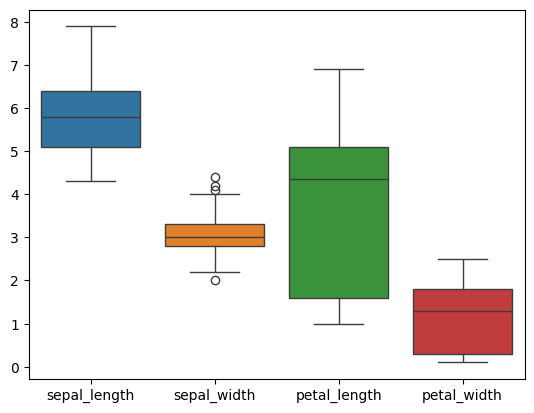

In [73]:
sns.boxplot(iris)

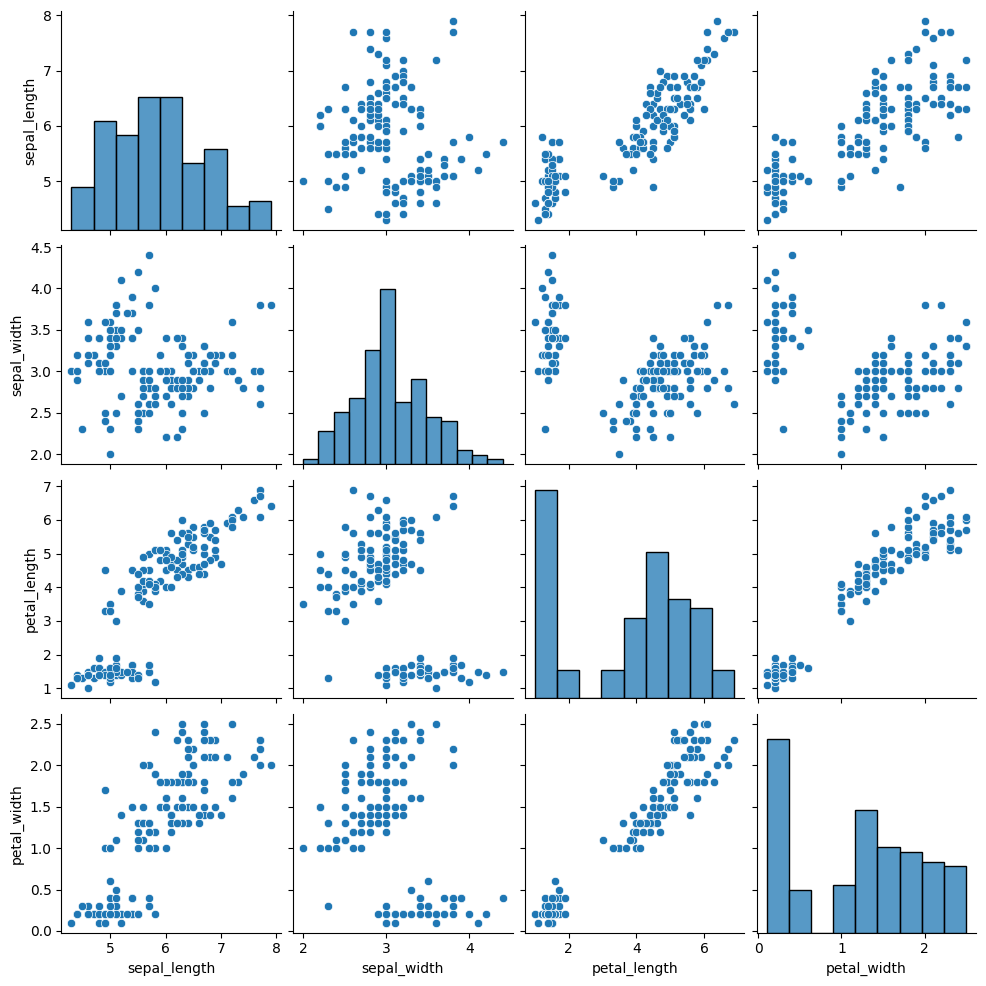

In [74]:
sns.pairplot(iris)

In [80]:
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(iris)

In [33]:
kmeans_pp = KMeans(
    n_clusters=2, # find 3 clusters
    n_init=20, # find the best clustering out of 20 tries with different initialization
    init='k-means++', # use k-means++ initialization
    max_iter=300, tol=0.0001)

In [36]:
start_time=time.time()
cluster_assignments=kmeans_pp.fit_predict(standardized_data)
print(time.time()-start_time)

c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


2.5132133960723877


In [37]:
def k_means_report(kmeans):
    print(f'k-means \n * has seen {kmeans.n_features_in_} features,\n \
* used {kmeans.n_iter_} iterations, and \n \
* resulted in an inertia of {kmeans.inertia_}.')

In [38]:
k_means_report(kmeans_pp)

k-means 
 * has seen 4 features,
 * used 2 iterations, and 
 * resulted in an inertia of 222.361704965023.


In [39]:
kmeans_pp.cluster_centers_

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 0.50728948, -0.42663134,  0.65249366,  0.62744675]])

In [ ]:

colors = ['darkorange', 'darkmagenta', 'dodgerblue', 'green', 'blue']  # Add a fourth color

def print_clustering(standardized_data, kmeans, cluster_assignments,x,y):
    plt.figure(figsize=(8, 8))

#    for i in range(0,len(np.unique(cluster_assignments))):
    for i in np.unique(cluster_assignments):
        X_sub=standardized_data[cluster_assignments==i, :]
        plt.scatter(X_sub[:, x], X_sub[:, y], c=colors[i], label=i)
    
    plt.scatter(
        kmeans.cluster_centers_[:, x], 
        kmeans.cluster_centers_[:, y],
        s=350, marker='*', c='crimson', edgecolor='black'
    )

    plt.legend()
    
# Loop through all combinations of feature indices for plotting
for i in range(4):  # Assuming there are 4 features (0 to 3)
    for j in range(i + 1, 4):  # Ensure j is greater than i
        print_clustering(standardized_data, kmeans_pp, cluster_assignments, i, j)


2-10 Clusters

In [59]:
# Initialize lists to store results
silhouette_scores = []

# Run k-means clustering for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
    cluster_assignments = kmeans.fit_predict(standardized_data)
    silhouette_avg = silhouette_score(standardized_data, cluster_assignments)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.3f}')


For n_clusters = 2, the average silhouette score is: 0.582
For n_clusters = 3, the average silhouette score is: 0.460
For n_clusters = 4, the average silhouette score is: 0.387
For n_clusters = 5, the average silhouette score is: 0.342
For n_clusters = 6, the average silhouette score is: 0.326
For n_clusters = 7, the average silhouette score is: 0.326
For n_clusters = 8, the average silhouette score is: 0.331
For n_clusters = 9, the average silhouette score is: 0.352
For n_clusters = 10, the average silhouette score is: 0.347


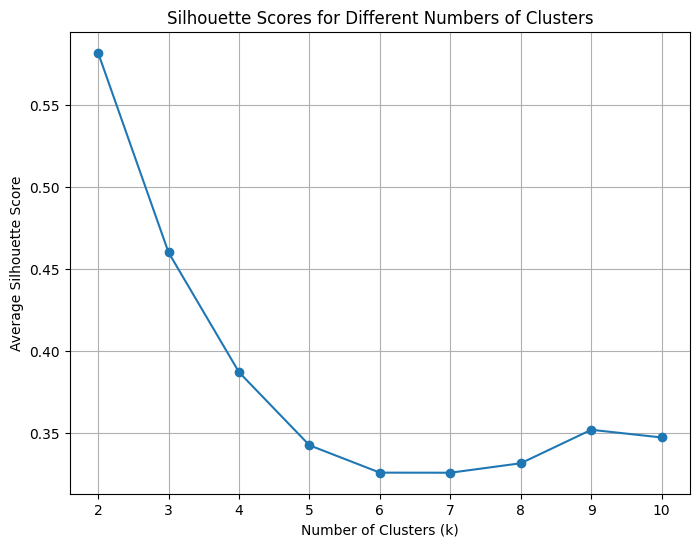

In [60]:
# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [82]:
variance = pd.DataFrame(standardized_data, columns=iris.columns).var()
print(variance)

sepal_length    0.052908
sepal_width     0.032983
petal_length    0.089522
petal_width     0.100869
dtype: float64


In [87]:
selector = VarianceThreshold(threshold=0.06)
reduced_data = selector.fit_transform(standardized_data)

# Get the remaining features
selected_features = iris.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['petal_length', 'petal_width'], dtype='object')


In [89]:
# Initialize lists to store results
silhouette_scores = []

# Run k-means clustering for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
    cluster_assignments = kmeans.fit_predict(reduced_data)
    silhouette_avg = silhouette_score(reduced_data, cluster_assignments)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.3f}')


For n_clusters = 2, the average silhouette score is: 0.742
For n_clusters = 3, the average silhouette score is: 0.676
For n_clusters = 4, the average silhouette score is: 0.600
For n_clusters = 5, the average silhouette score is: 0.576
For n_clusters = 6, the average silhouette score is: 0.591
For n_clusters = 7, the average silhouette score is: 0.579
For n_clusters = 8, the average silhouette score is: 0.592
For n_clusters = 9, the average silhouette score is: 0.486
For n_clusters = 10, the average silhouette score is: 0.451


In [109]:
kmeans = KMeans(n_clusters=2, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
cluster_assignments = kmeans.fit_predict(reduced_data)
silhouette_avg = silhouette_score(reduced_data, cluster_assignments)
silhouette_scores.append(silhouette_avg)
print(f'For {2}, the average silhouette score is: {silhouette_avg:.3f}')

For 2, the average silhouette score is: 0.742


In [110]:
assignment2 = cluster_assignments

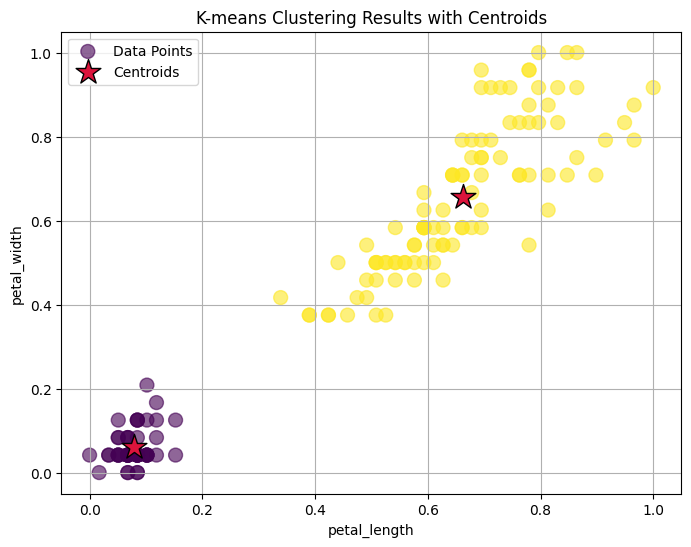

In [97]:
plt.figure(figsize=(8, 6))

# Scatter plot of data points colored by cluster assignment
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_assignments, cmap='viridis', s=100, alpha=0.6, label='Data Points')

# Plot the cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=350, marker='*', c='crimson', edgecolor='black', label='Centroids'
)

plt.title('K-means Clustering Results with Centroids')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.grid()
plt.show()

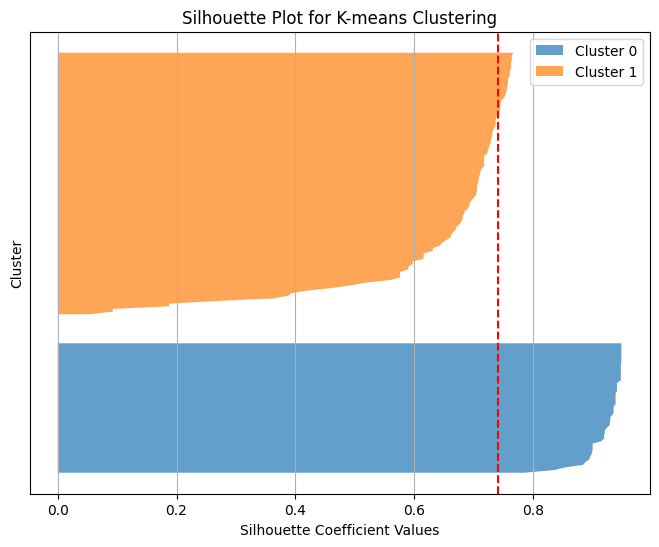

In [98]:
# Calculate the silhouette scores for each sample
silhouette_vals = silhouette_samples(reduced_data, cluster_assignments)

# Set up the silhouette plot
y_lower = 10  # Initial position on the y-axis

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_assignments):
    # Aggregate the silhouette scores for each cluster
    ith_cluster_silhouette_vals = silhouette_vals[cluster_assignments == i]
    ith_cluster_silhouette_vals.sort()
    
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    # Fill the area for this cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    
    # Move y_lower for the next cluster
    y_lower = y_upper + 10  # Add some space between clusters

# Draw a vertical line for the average silhouette score
plt.axvline(x=silhouette_avg, color='red', linestyle='--')

plt.title('Silhouette Plot for K-means Clustering')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

In [111]:
kmeans = KMeans(n_clusters=3, n_init=20, init='k-means++', max_iter=300, tol=0.0001)
cluster_assignments = kmeans.fit_predict(reduced_data)
silhouette_avg = silhouette_score(reduced_data, cluster_assignments)
silhouette_scores.append(silhouette_avg)
print(f'For {3}, the average silhouette score is: {silhouette_avg:.3f}')

For 3, the average silhouette score is: 0.676


In [112]:
assignment3 = cluster_assignments

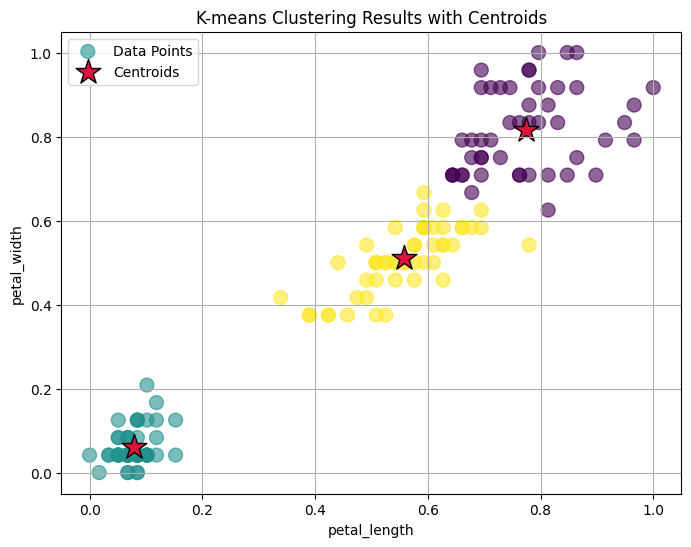

In [100]:
plt.figure(figsize=(8, 6))

# Scatter plot of data points colored by cluster assignment
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_assignments, cmap='viridis', s=100, alpha=0.6, label='Data Points')

# Plot the cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=350, marker='*', c='crimson', edgecolor='black', label='Centroids'
)

plt.title('K-means Clustering Results with Centroids')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.grid()
plt.show()

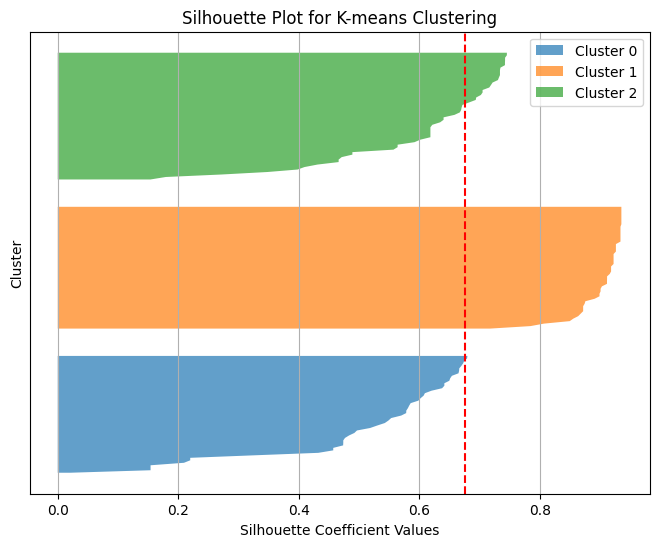

In [101]:
# Calculate the silhouette scores for each sample
silhouette_vals = silhouette_samples(reduced_data, cluster_assignments)

# Set up the silhouette plot
y_lower = 10  # Initial position on the y-axis

plt.figure(figsize=(8, 6))
for i in np.unique(cluster_assignments):
    # Aggregate the silhouette scores for each cluster
    ith_cluster_silhouette_vals = silhouette_vals[cluster_assignments == i]
    ith_cluster_silhouette_vals.sort()
    
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    # Fill the area for this cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
    
    # Move y_lower for the next cluster
    y_lower = y_upper + 10  # Add some space between clusters

# Draw a vertical line for the average silhouette score
plt.axvline(x=silhouette_avg, color='red', linestyle='--')

plt.title('Silhouette Plot for K-means Clustering')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

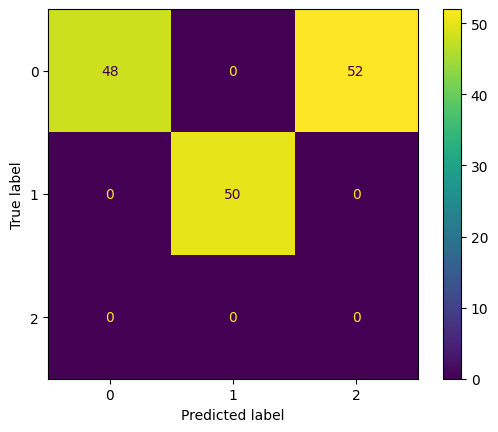

In [117]:
ConfusionMatrixDisplay.from_predictions(assignment2, assignment3)

In [124]:
iris['c'] = assignment2

In [142]:
# Grouping the Iris dataset by the column 'c' and aggregating the mean, min, and max
iris.groupby('c').agg(['mean', 'min', 'max'])

sepal_length           sepal_width           petal_length            \
          mean  min  max        mean  min  max         mean  min  max   
c                                                                       
0        6.262  4.9  7.9       2.872  2.0  3.8        4.906  3.0  6.9   
1        5.006  4.3  5.8       3.428  2.3  4.4        1.462  1.0  1.9   

  petal_width            
         mean  min  max  
c                        
0       1.676  1.0  2.5  
1       0.246  0.1  0.6

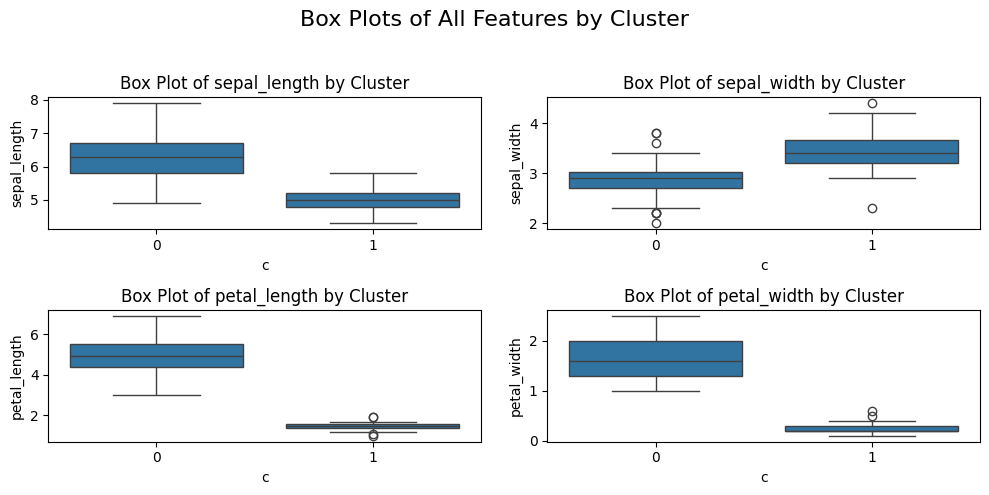

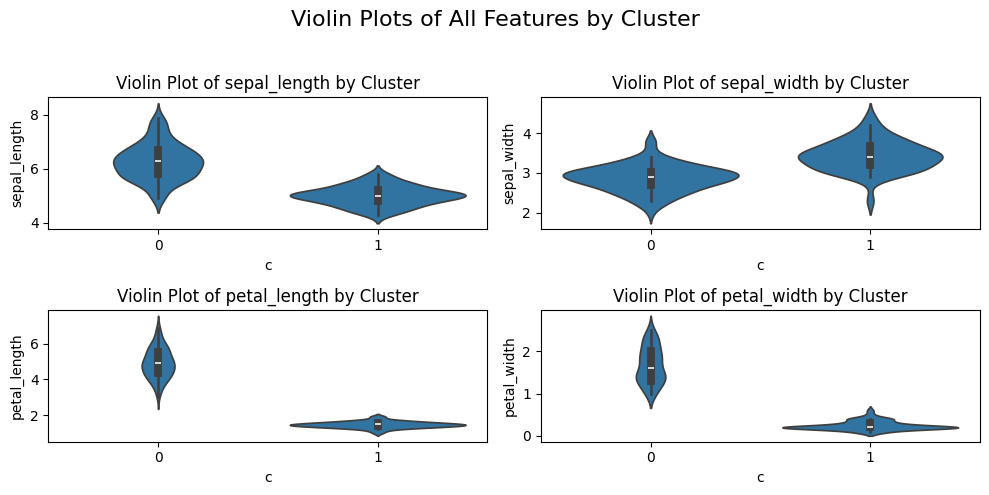

In [141]:
# List of feature columns
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create subplots for box plots
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.suptitle('Box Plots of All Features by Cluster', fontsize=16)

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='c', y=feature, data=iris)
    plt.title(f'Box Plot of {feature} by Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap with the title
plt.show()

# Create subplots for violin plots
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.suptitle('Violin Plots of All Features by Cluster', fontsize=16)

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='c', y=feature, data=iris)
    plt.title(f'Violin Plot of {feature} by Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap with the title
plt.show()